<IPython.core.display.Javascript object>


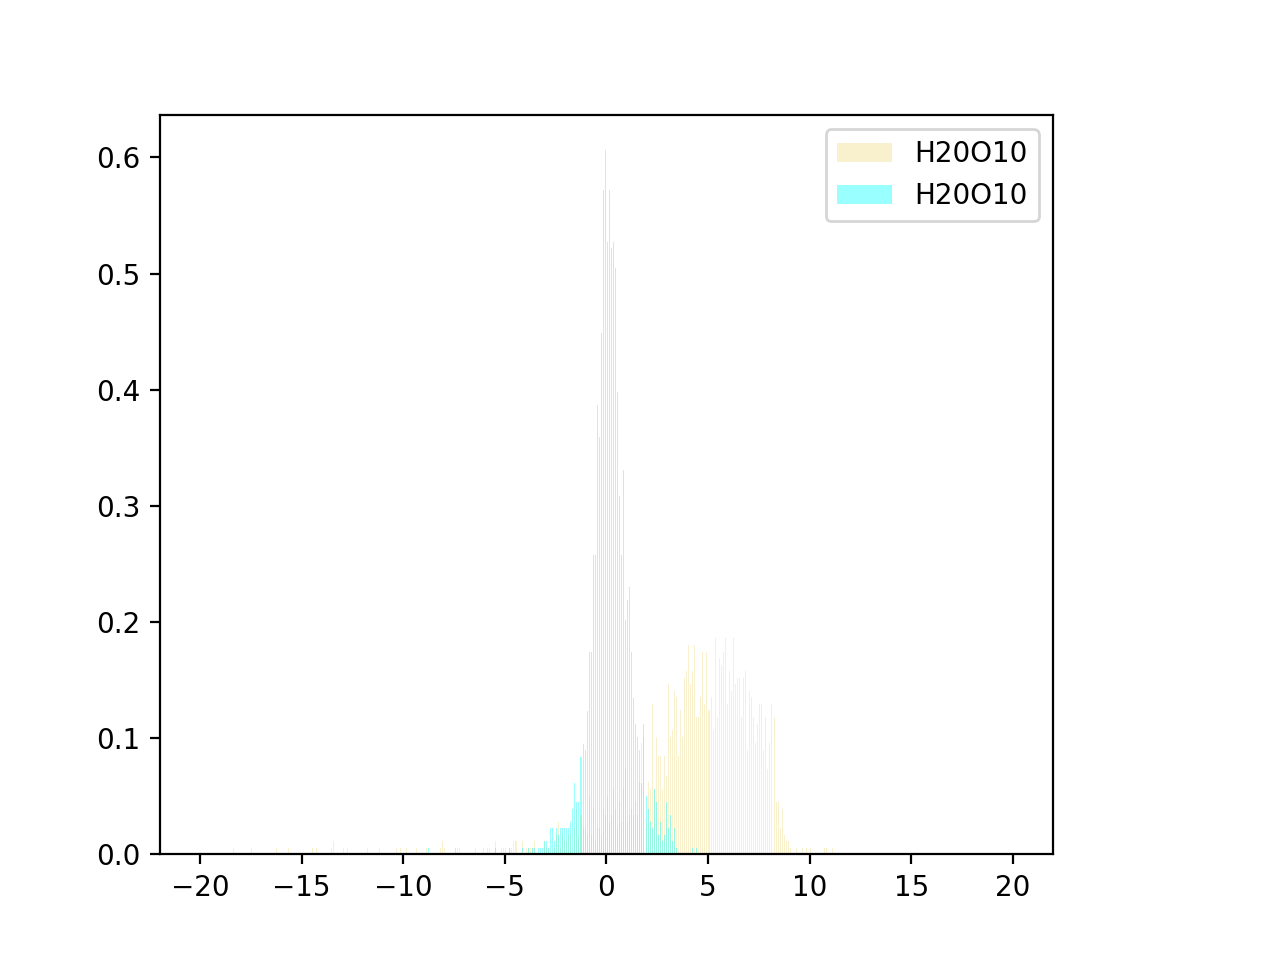

<IPython.core.display.Javascript object>


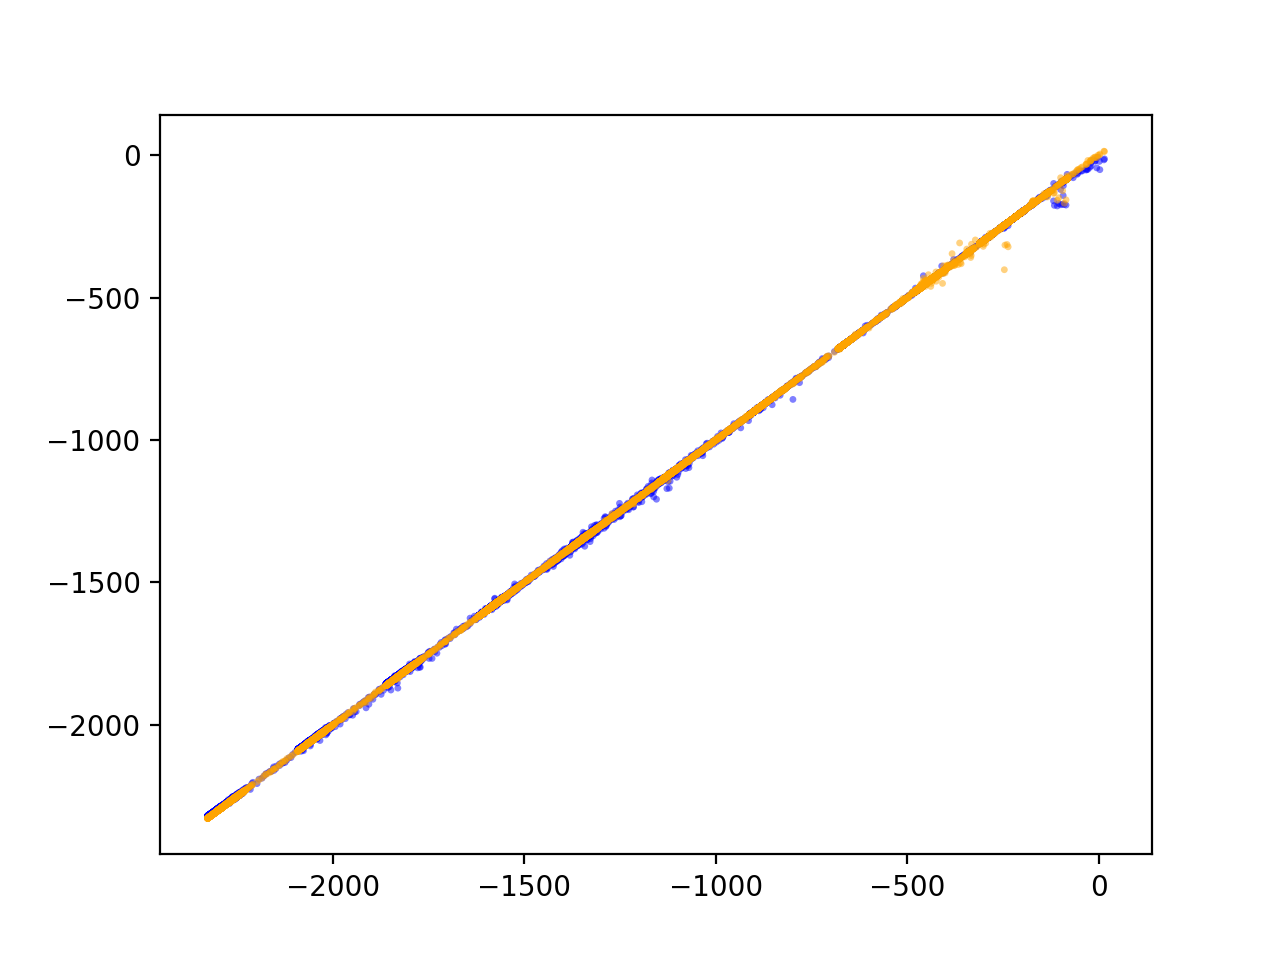

In [44]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_ref_eng = {"H": -0.4993212, "C": -37.8338334, "N": -54.5732825, "O": -75.0424519, 
                 "F": -99.6949007, "S": -398.0814169, "Cl": -460.1167006}

fig = plt.figure(0)
ax = plt.subplot(111)
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

colors = ['#808080', '#0000FF', '#ADD8E6', '#A52A2A', '#9966FF', '#F0DC82', '#00FFFF', \
          '#FFD700', '#DAA520', '#D3D3D3', '#008000', '#FF00FF', '#FF8C00', '#FFC0CB', \
          '#FF0000', '#EE82EE']

db = anidataloader('./ani_HO_ene_forces_wb97x_dz_ani1x_set.h5')
for i, data in enumerate(db):
    formula = data['path'].split('/')[-1]
    species = data['species']
    n_atom = len(data['species'])
    wb97x_data_energy = data['wb97x_dz_energy']
    wb97x_data_forces = data['wb97x_dz_forces']
    model_data_energy = data['model_energy']
    model_data_forces = data['model_forces']
    ani1x_data_energy = data['ani1x_energy']
    ani1x_data_forces = data['ani1x_forces']
    min_idx = np.argmin(wb97x_data_energy)
    
    eng_diff1 = (model_data_energy - wb97x_data_energy) * 627.509
    eng_diff2 = (ani1x_data_energy - wb97x_data_energy) * 627.509

    ##'''
    wb97x_ref_data = 0.0
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
    model_ref_data = wb97x_ref_data
    ani1x_ref_data = wb97x_ref_data
    '''
    if wb97x_data_energy.size > 0:
        wb97x_ref_data = wb97x_data_energy[min_idx] 
        model_ref_data = model_data_energy[min_idx]
        ani1x_ref_data = ani1x_data_energy[min_idx]
    '''
    wb97x_data_energy = (wb97x_data_energy - wb97x_ref_data) * 627.509 # / float(n_atom)
    model_data_energy = (model_data_energy - model_ref_data) * 627.509 # / float(n_atom)
    ani1x_data_energy = (ani1x_data_energy - ani1x_ref_data) * 627.509 # / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    ## '''
    if i == 5:
    #     ax.scatter(wb97x_data_energy, model_data_energy, edgecolors='none', s=8, alpha=0.8, c=colors[i % len(colors)])
        n, bins, patches = plt.hist(eng_diff1, bins=400, range=(-20.0, 20.0), rwidth=0.5, density=True, \
                                   facecolor=colors[i % len(colors)], alpha=0.4, label=(formula))
        n, bins, patches = plt.hist(eng_diff2, bins=400, range=(-20.0, 20.0), rwidth=0.5, density=True, \
                                    facecolor=colors[(i+1) % len(colors)], alpha=0.4, label=(formula))
    # ax.scatter(x, eng_diff, edgecolors='none', s=8, alpha=0.8, c=colors[i % len(colors)])
    
    if i == 0:
        wb97x_energies = wb97x_data_energy
        model_energies = model_data_energy
        ani1x_energies = ani1x_data_energy
    else:
        wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energy), axis=None)
        model_energies = np.concatenate((model_energies, model_data_energy), axis=None)
        ani1x_energies = np.concatenate((ani1x_energies, ani1x_data_energy), axis=None)

plt.legend()
plt.show()

x1 = np.linspace(start = 0., stop = 600.0, num = 601)

plt.figure(1)
plt.scatter(wb97x_energies, model_energies, edgecolors='none', c='blue', s=6, alpha=0.5)
plt.scatter(wb97x_energies, ani1x_energies, edgecolors='none', c='orange', s=6, alpha=0.5)
# plt.plot(x1, x1, c='yellow', label=('Line y = x'))
# plt.legend()
plt.show()


<IPython.core.display.Javascript object>


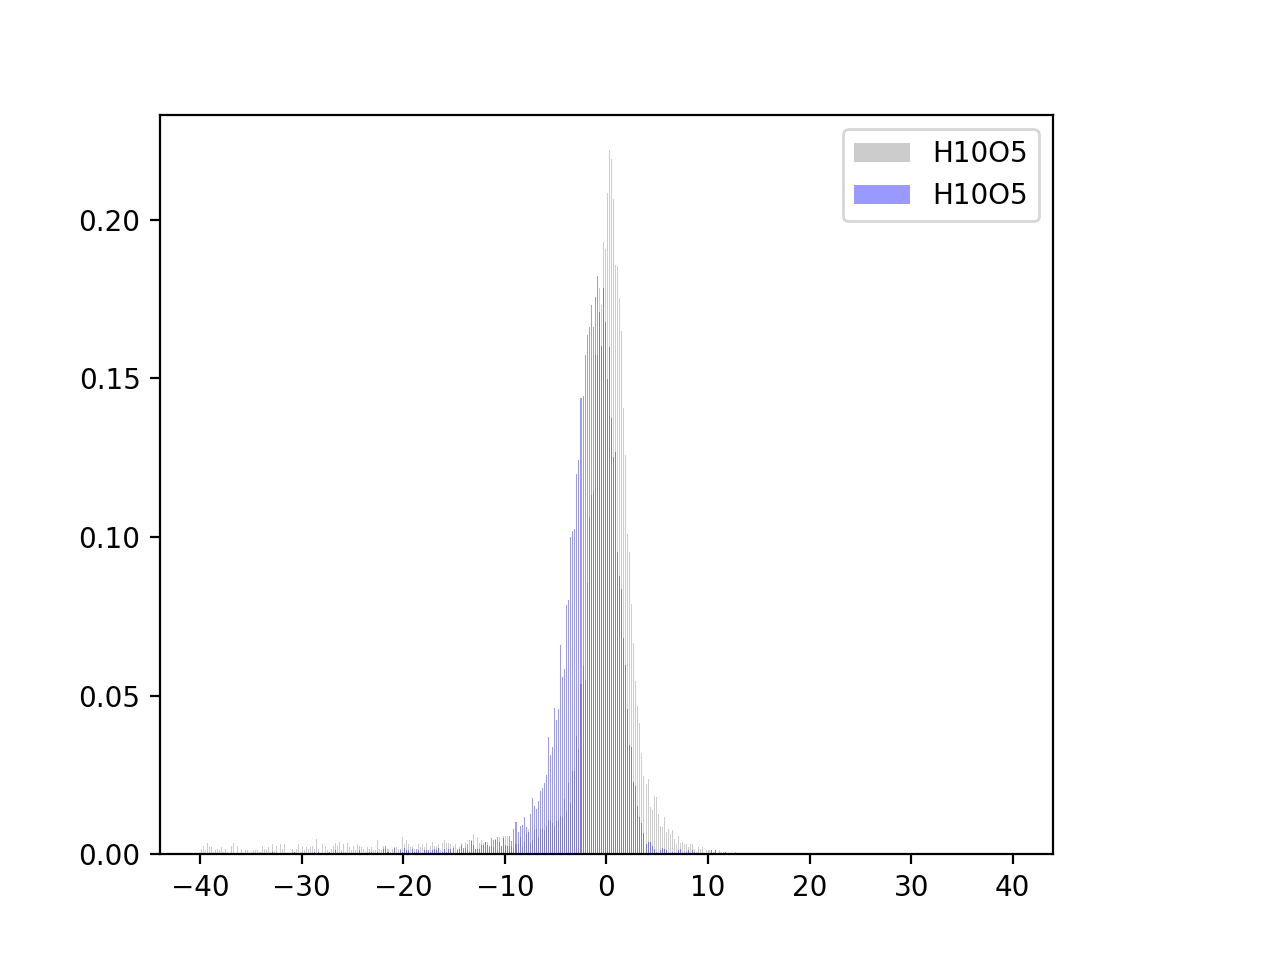

/H12O6 [4991]
wb97x_data_energies [-142710.98963414]


<IPython.core.display.Javascript object>


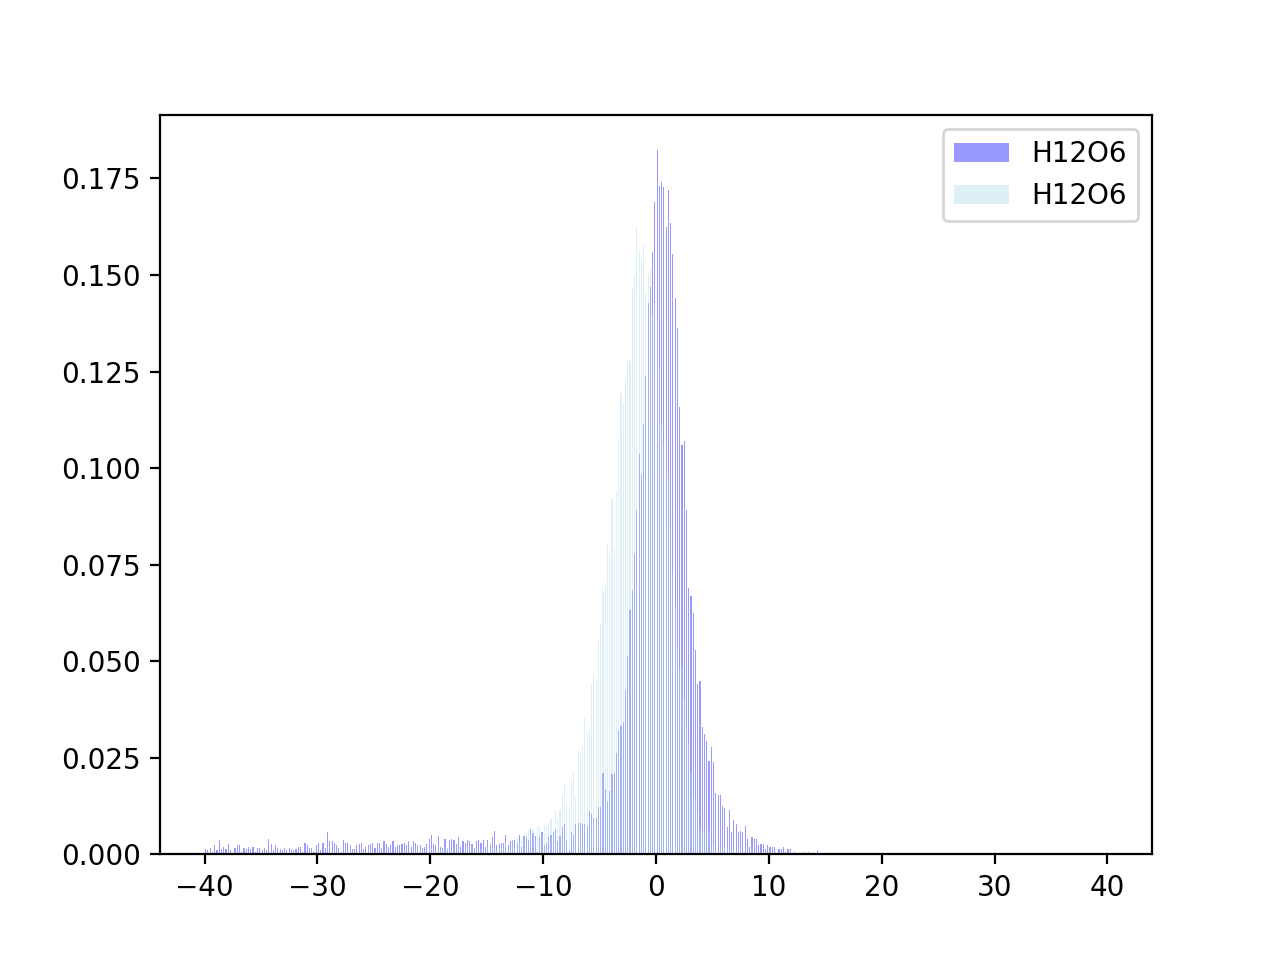

<IPython.core.display.Javascript object>


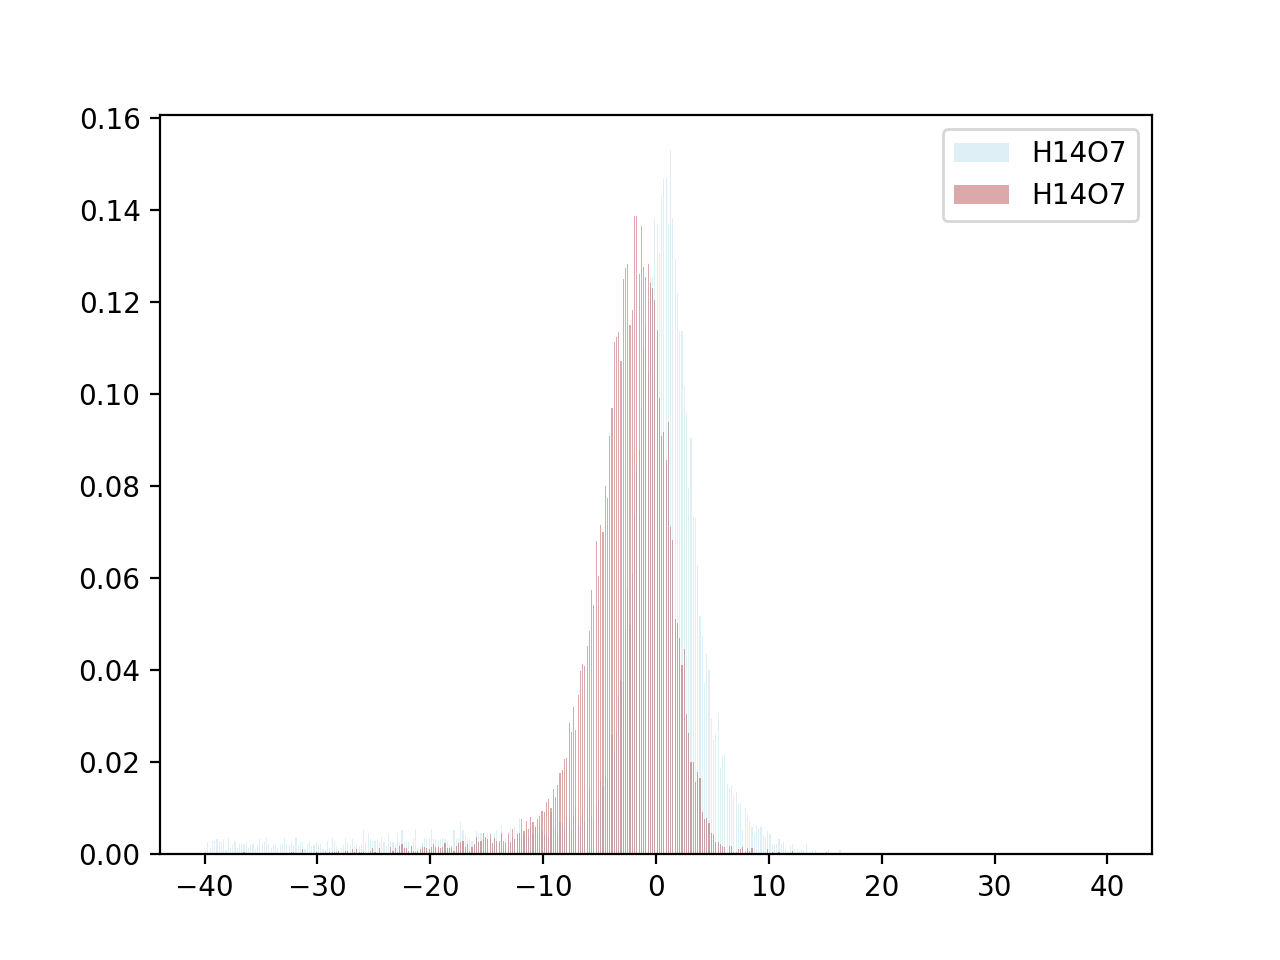

/H16O8 [3934 4317]
wb97x_data_energies [-243545.44802468 -230333.27212589]


<IPython.core.display.Javascript object>


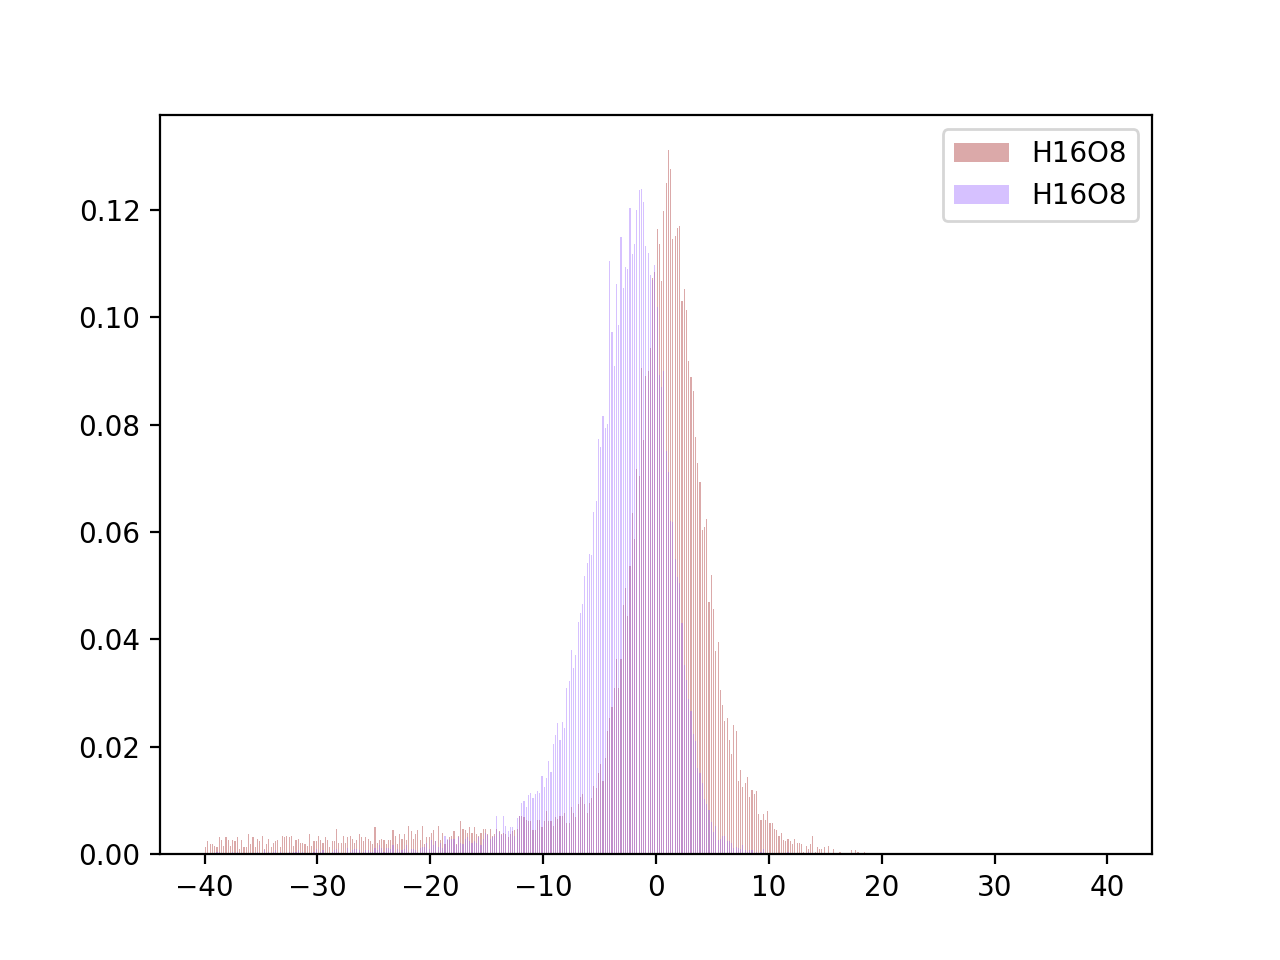

<IPython.core.display.Javascript object>


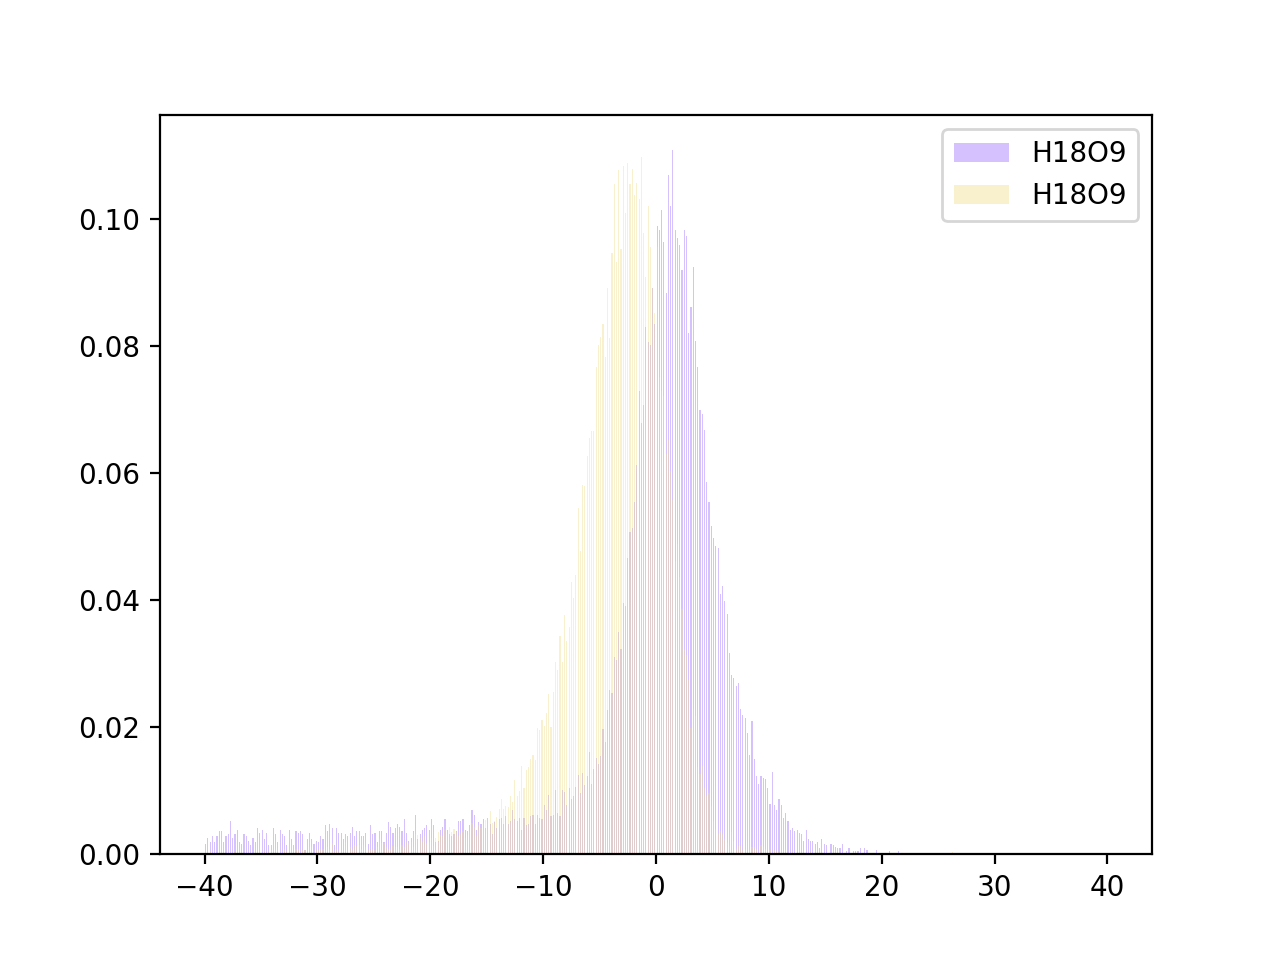

<IPython.core.display.Javascript object>


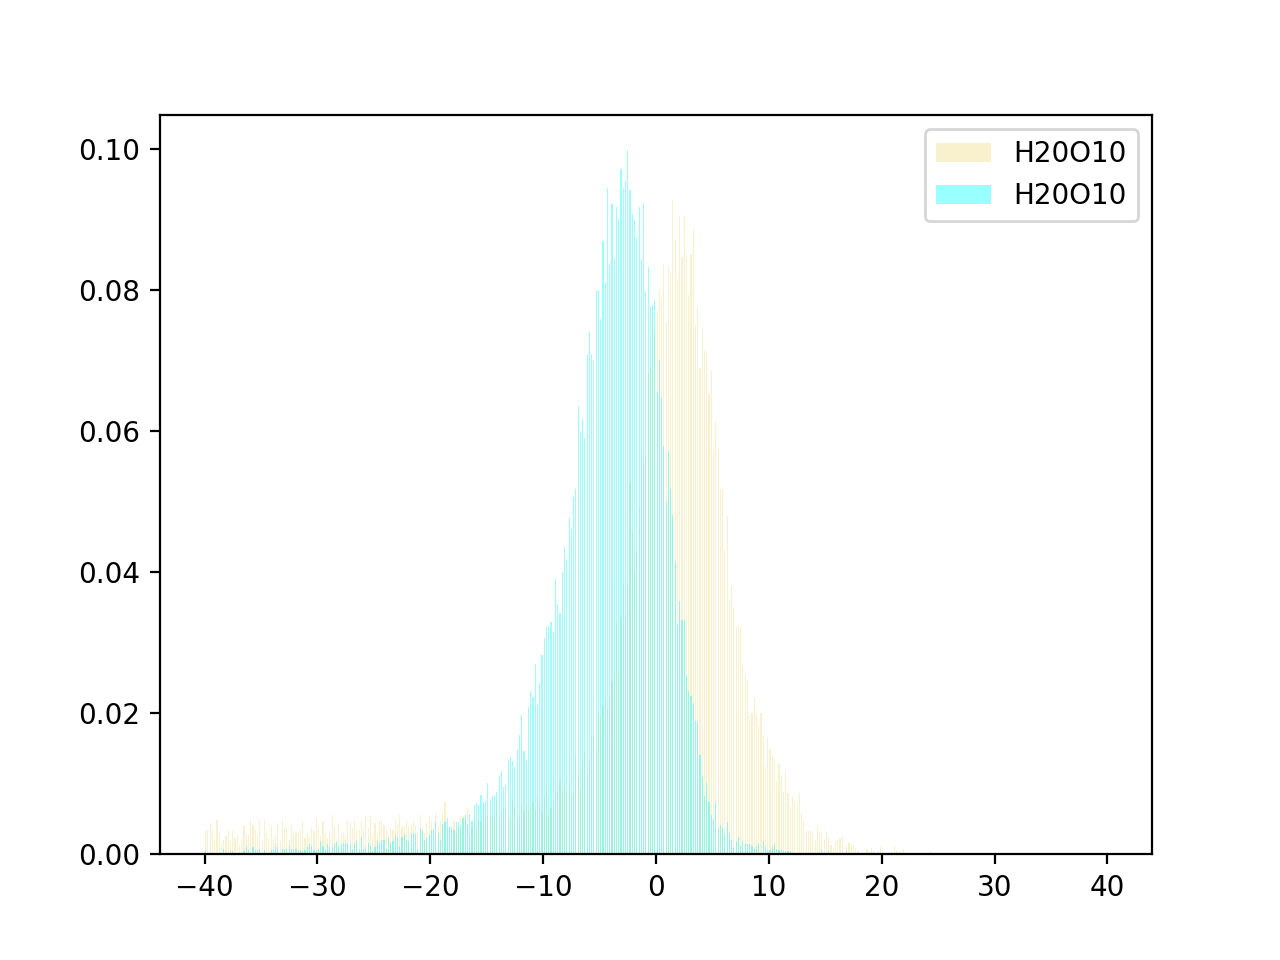

<IPython.core.display.Javascript object>


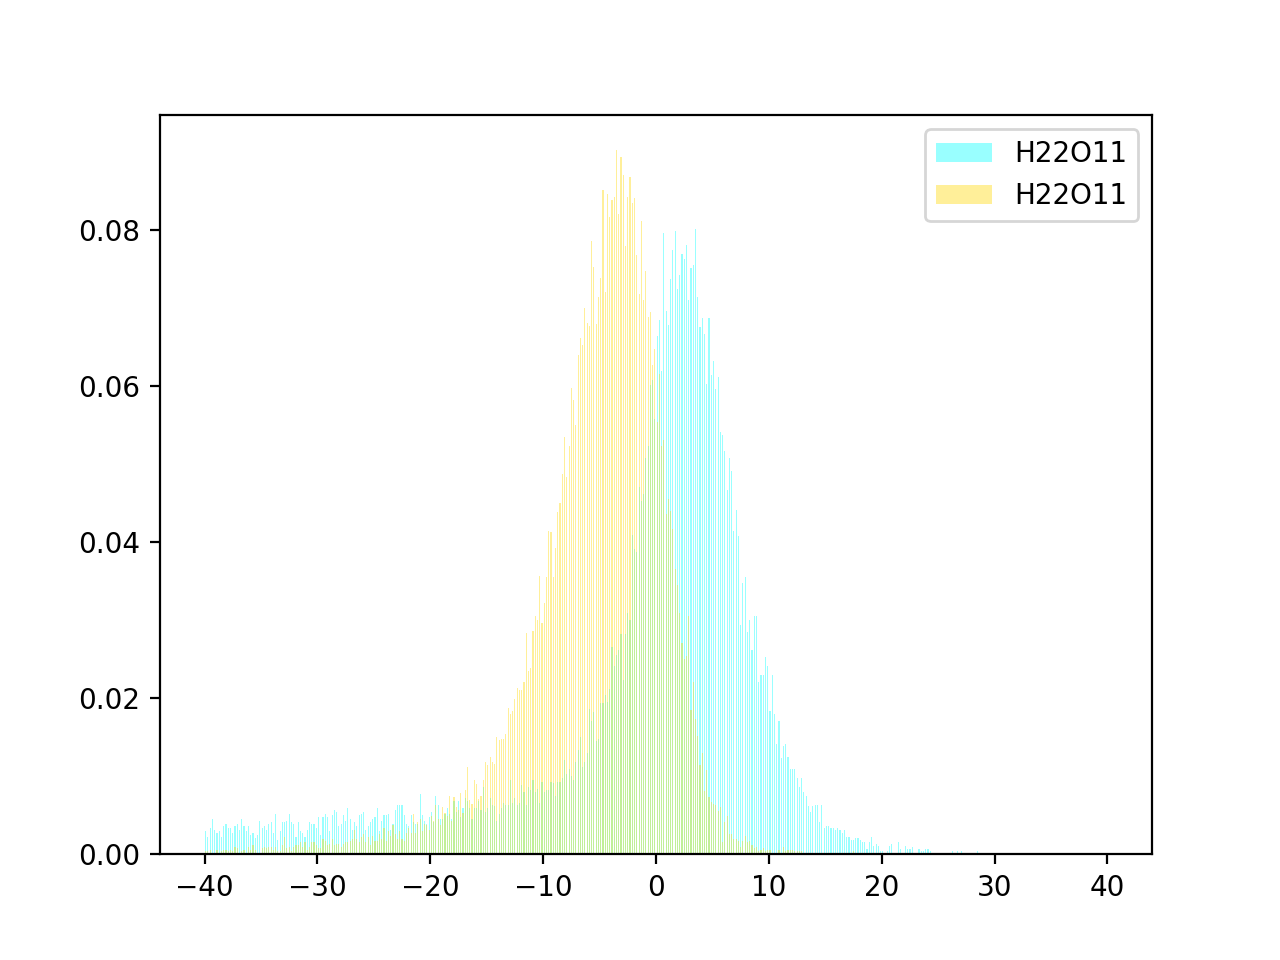

<IPython.core.display.Javascript object>


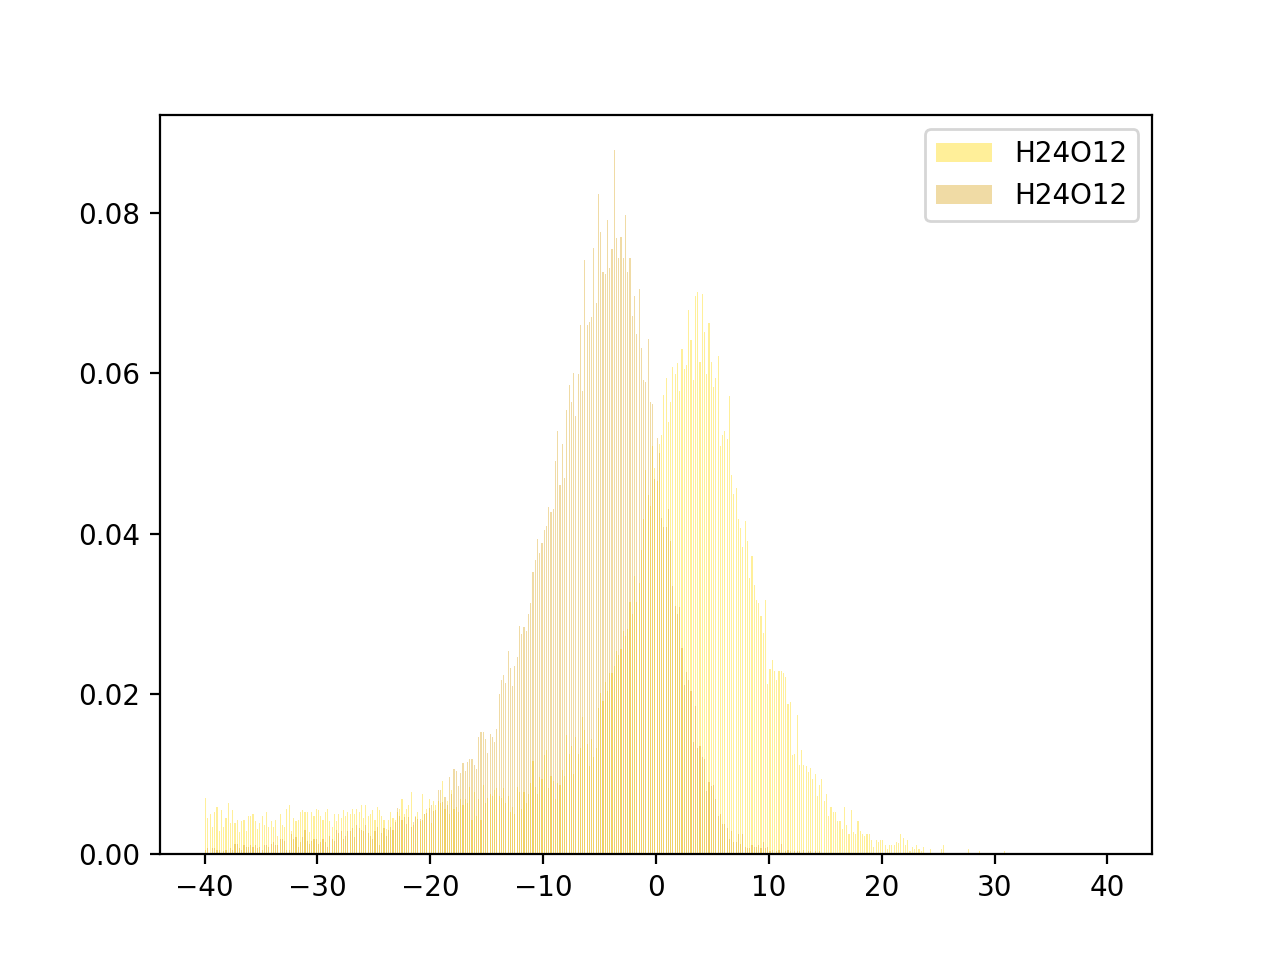

<IPython.core.display.Javascript object>


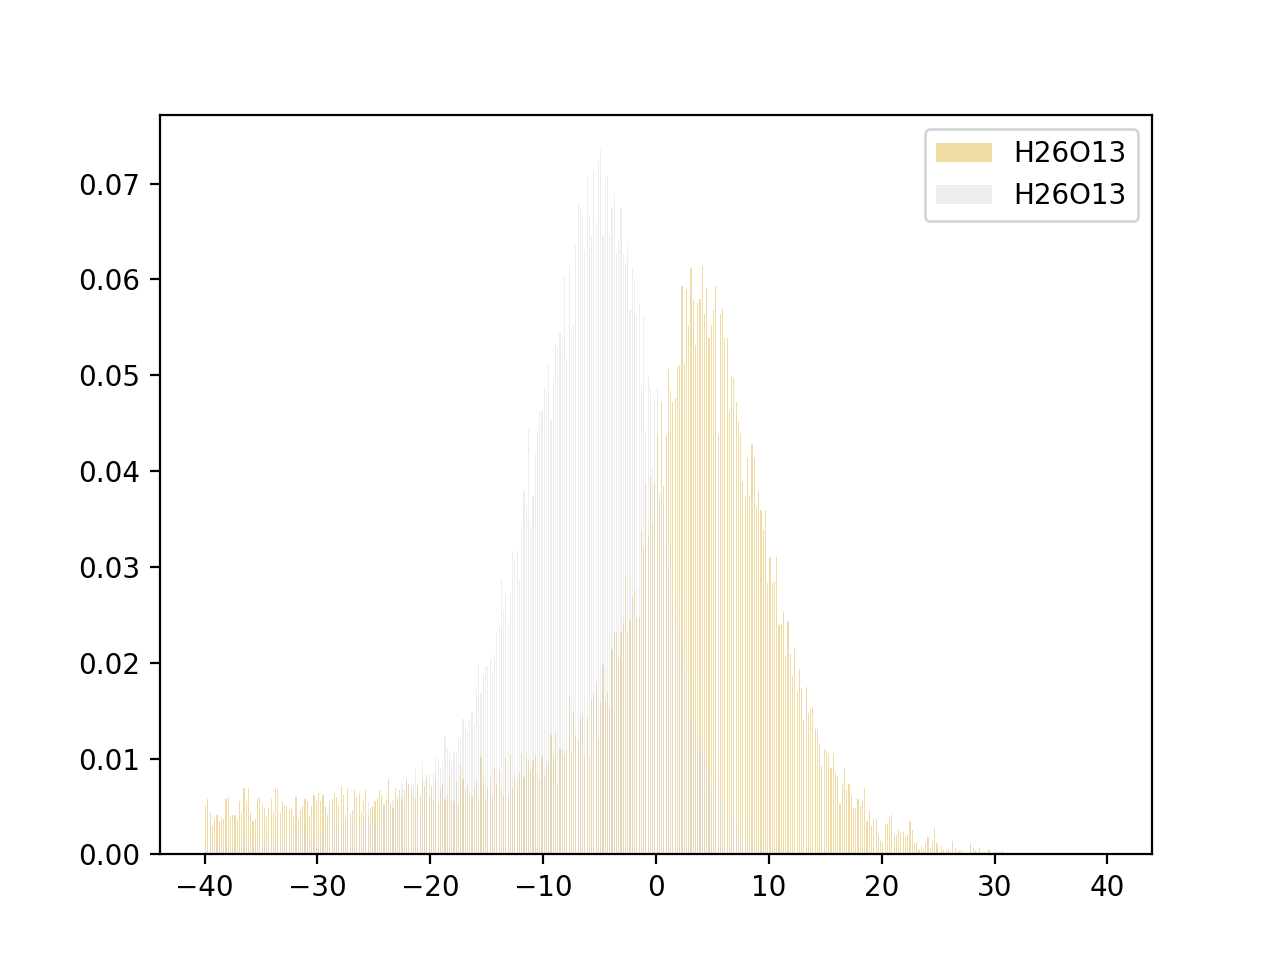

<IPython.core.display.Javascript object>


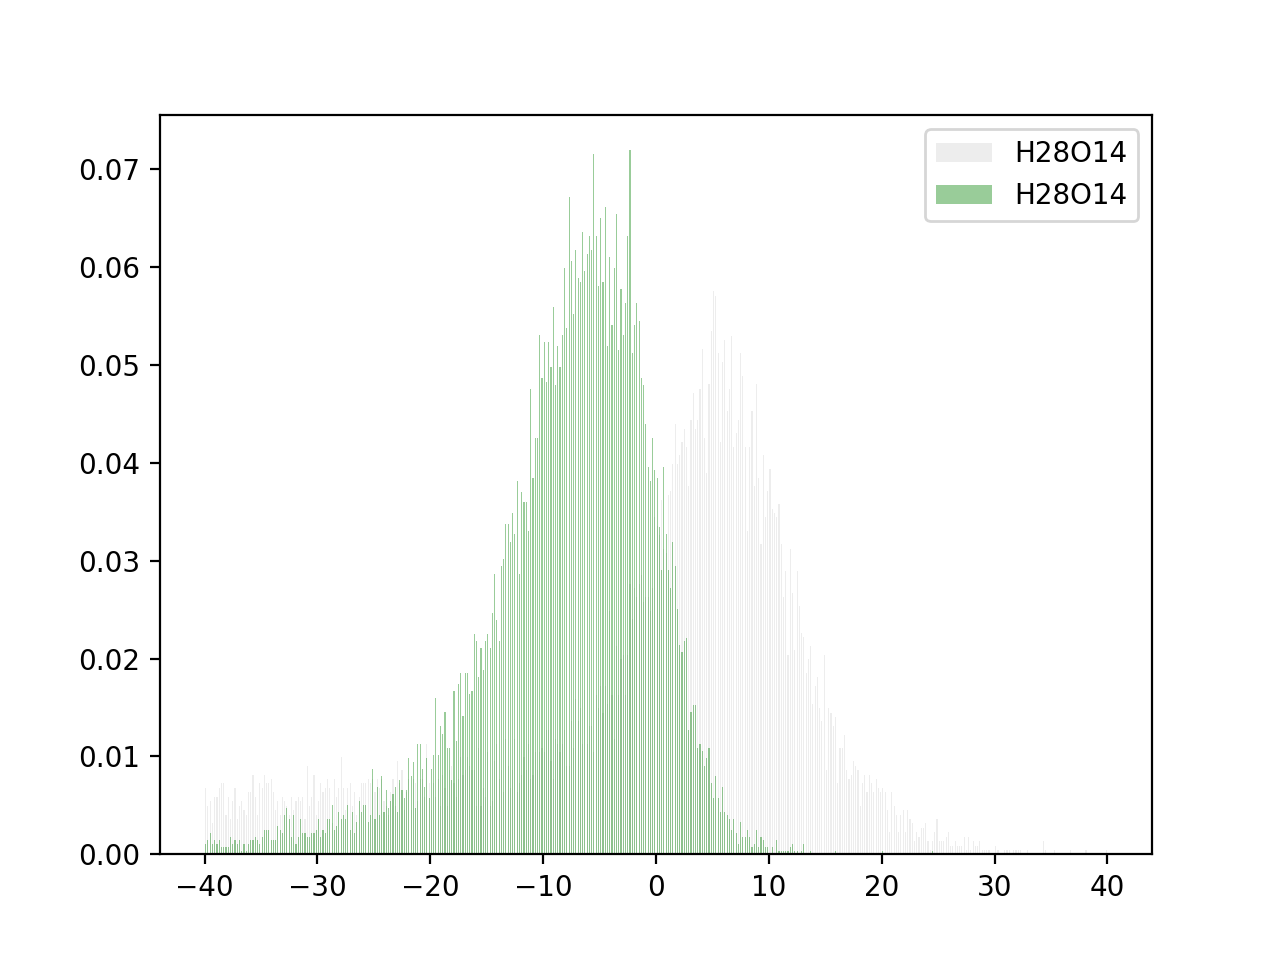

<IPython.core.display.Javascript object>


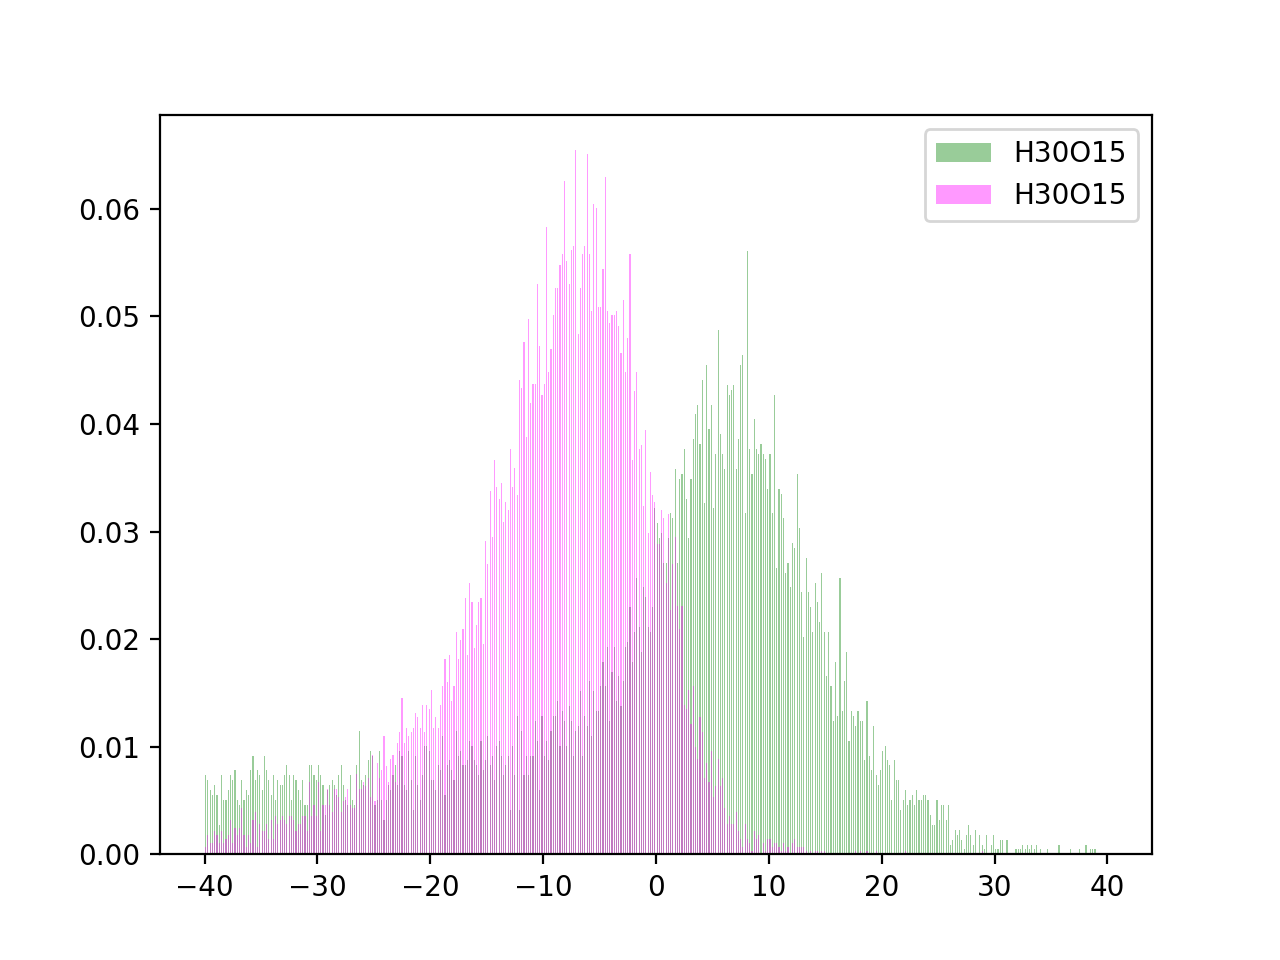

<IPython.core.display.Javascript object>


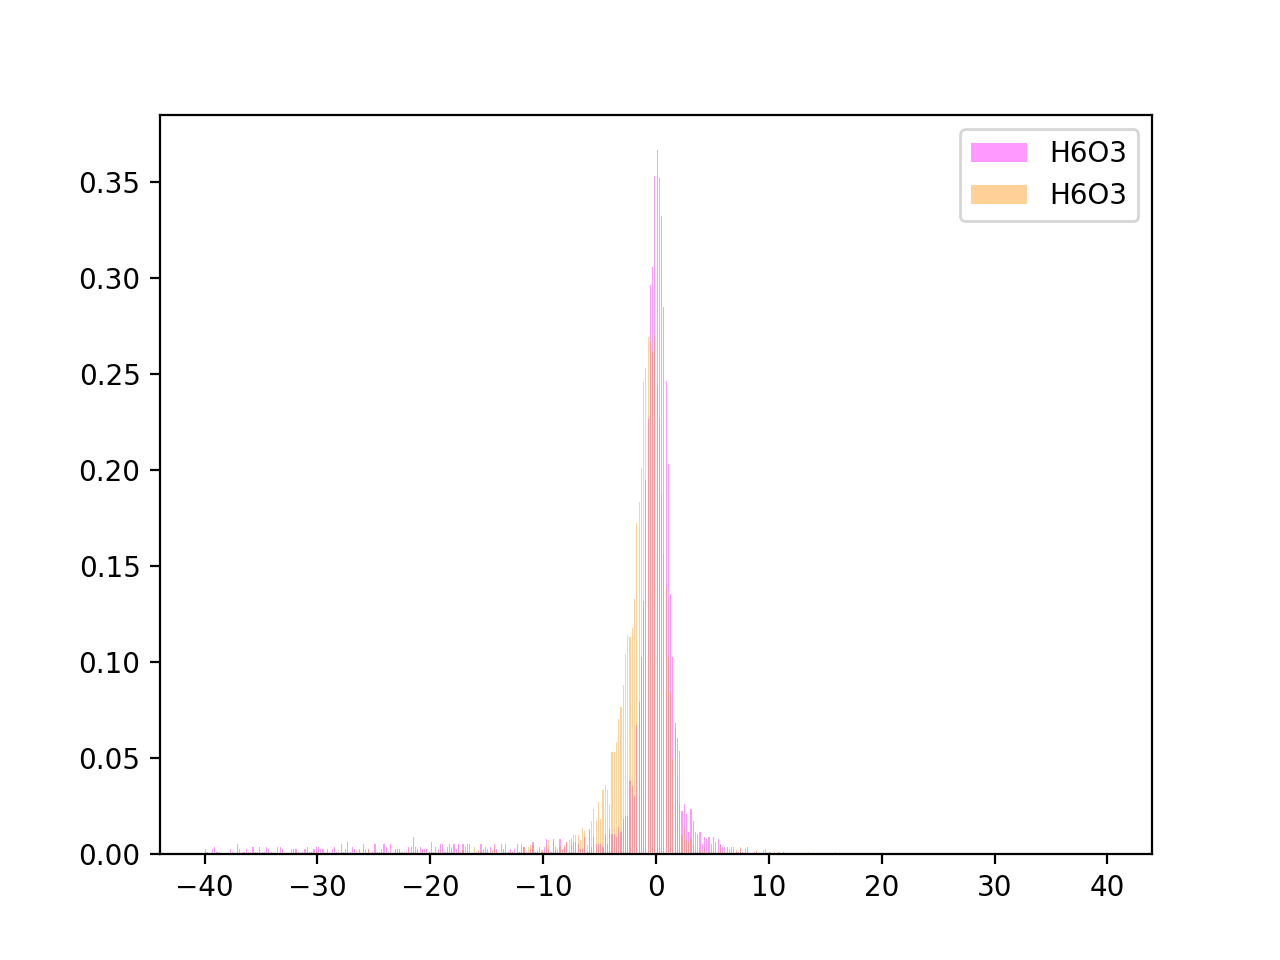

<IPython.core.display.Javascript object>


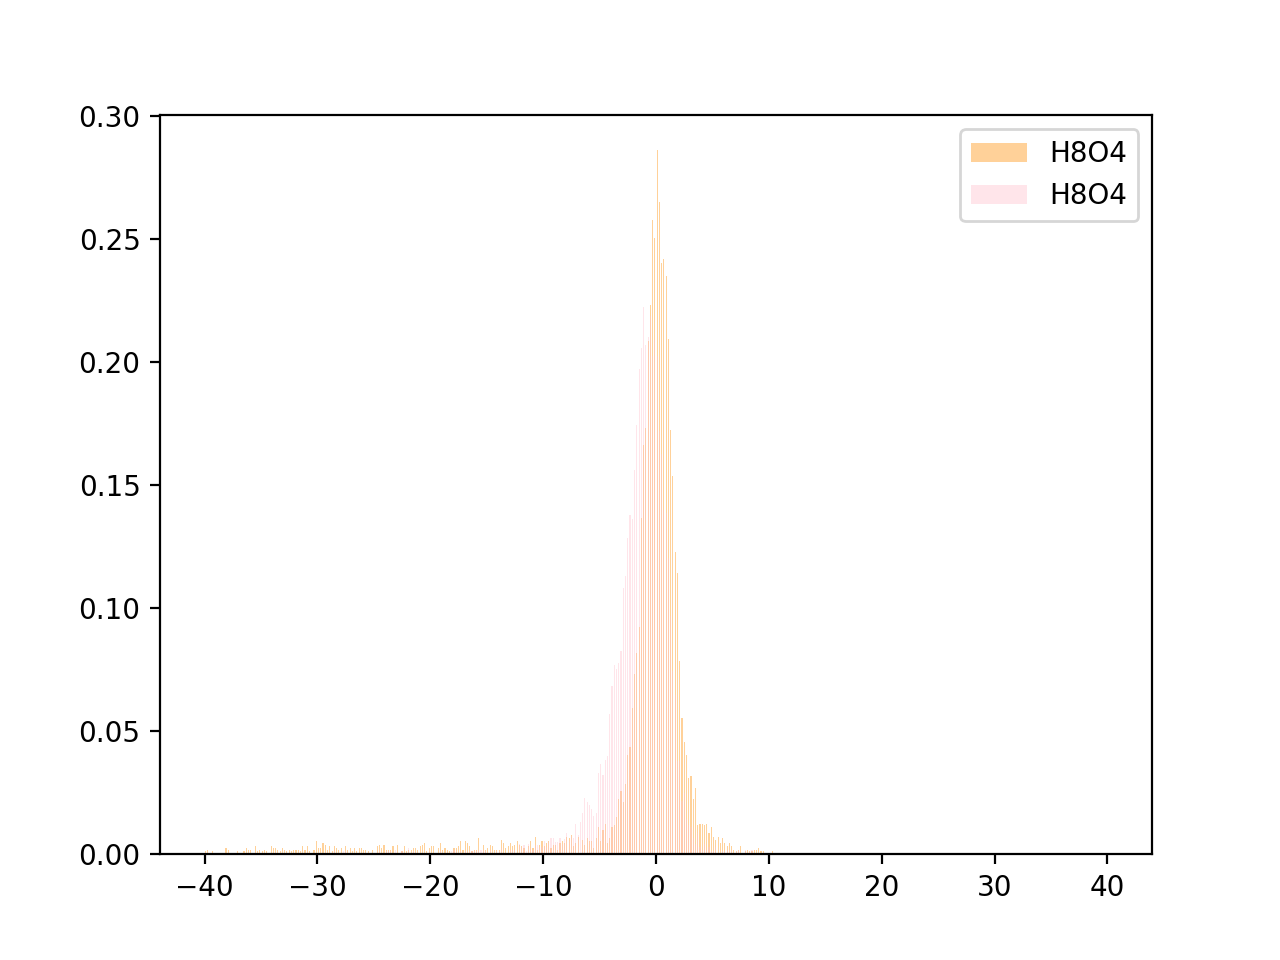

In [68]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_ref_eng = {"H": -0.4993212, "C": -37.8338334, "N": -54.5732825, "O": -75.0424519, 
                 "F": -99.6949007, "S": -398.0814169, "Cl": -460.1167006}

fig = plt.figure(0)
ax = plt.subplot(111)
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

colors = ['#808080', '#0000FF', '#ADD8E6', '#A52A2A', '#9966FF', '#F0DC82', '#00FFFF', \
          '#FFD700', '#DAA520', '#D3D3D3', '#008000', '#FF00FF', '#FF8C00', '#FFC0CB', \
          '#FF0000', '#EE82EE']

db = anidataloader('../dataset/ani2x_HO_ene_forces_wb97x_dz_ani1x_set.h5')
for i, data in enumerate(db):
    formula = data['path'].split('/')[-1]
    species = data['species']
    n_atom = len(data['species'])
    wb97x_data_energy = data['wb97x_dz_energy']
    wb97x_data_forces = data['wb97x_dz_forces']
    model_data_energy = data['model_energy']
    model_data_forces = data['model_forces']
    ani1x_data_energy = data['ani1x_energy']
    ani1x_data_forces = data['ani1x_forces']
    
    wb97x_ref_value = 0.0
    for at in species:
        wb97x_ref_value += wb97x_ref_eng.get(str(at), 0.0)

    wb97x_data_energy = (wb97x_data_energy - wb97x_ref_value) * 627.509 # / float(n_atom)
    model_data_energy = (model_data_energy - wb97x_ref_value) * 627.509 # / float(n_atom)
    ani1x_data_energy = (ani1x_data_energy - wb97x_ref_value) * 627.509 # / float(n_atom)
    
    # excludes for outliers
    index_list = np.argwhere(abs(wb97x_data_energy) > 4000.).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', wb97x_data_energy[index_list])
    low_eng_index = np.argwhere(abs(wb97x_data_energy) < 4000.0).reshape(-1)
    wb97x_data_energy = wb97x_data_energy[low_eng_index]
    model_data_energy = model_data_energy[low_eng_index]
    ani1x_data_energy = ani1x_data_energy[low_eng_index]

    min_idx = np.argmin(wb97x_data_energy)

    eng_diff1 = (model_data_energy - wb97x_data_energy) # * 627.509
    eng_diff2 = (ani1x_data_energy - wb97x_data_energy) # * 627.509

    '''
    wb97x_ref_data = 0.0
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
    model_ref_data = wb97x_ref_data
    ani1x_ref_data = wb97x_ref_data
    '''
    if wb97x_data_energy.size > 0:
        wb97x_ref_data = wb97x_data_energy[min_idx] 
        model_ref_data = model_data_energy[min_idx]
        ani1x_ref_data = ani1x_data_energy[min_idx]
    ## '''
    wb97x_data_energy = (wb97x_data_energy - wb97x_ref_data) # * 627.509 # / float(n_atom)
    model_data_energy = (model_data_energy - wb97x_ref_data) # * 627.509 # / float(n_atom)
    ani1x_data_energy = (ani1x_data_energy - wb97x_ref_data) # * 627.509 # / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    ## '''
    fig = plt.figure(i)
    n, bins, patches = plt.hist(eng_diff1, bins=400, range=(-40.0, 40.0), rwidth=0.5, density=True, \
                                facecolor=colors[i % len(colors)], alpha=0.4, label=(formula))
    n, bins, patches = plt.hist(eng_diff2, bins=400, range=(-40.0, 40.0), rwidth=0.5, density=True, \
                                facecolor=colors[(i+1) % len(colors)], alpha=0.4, label=(formula))
    # if i == 2:
    # ax.scatter(wb97x_data_energy, model_data_energy, edgecolors='none', s=8, alpha=0.8, c=colors[i % len(colors)])
    # ax.scatter(wb97x_data_energy, model_data_energy, edgecolors='none', s=8, alpha=0.8, c=colors[i % len(colors)])
    
    if i == 0:
        wb97x_energies = wb97x_data_energy
        model_energies = model_data_energy
        ani1x_energies = ani1x_data_energy
    else:
        wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energy), axis=None)
        model_energies = np.concatenate((model_energies, model_data_energy), axis=None)
        ani1x_energies = np.concatenate((ani1x_energies, ani1x_data_energy), axis=None)

    plt.legend()
    plt.show()



<IPython.core.display.Javascript object>


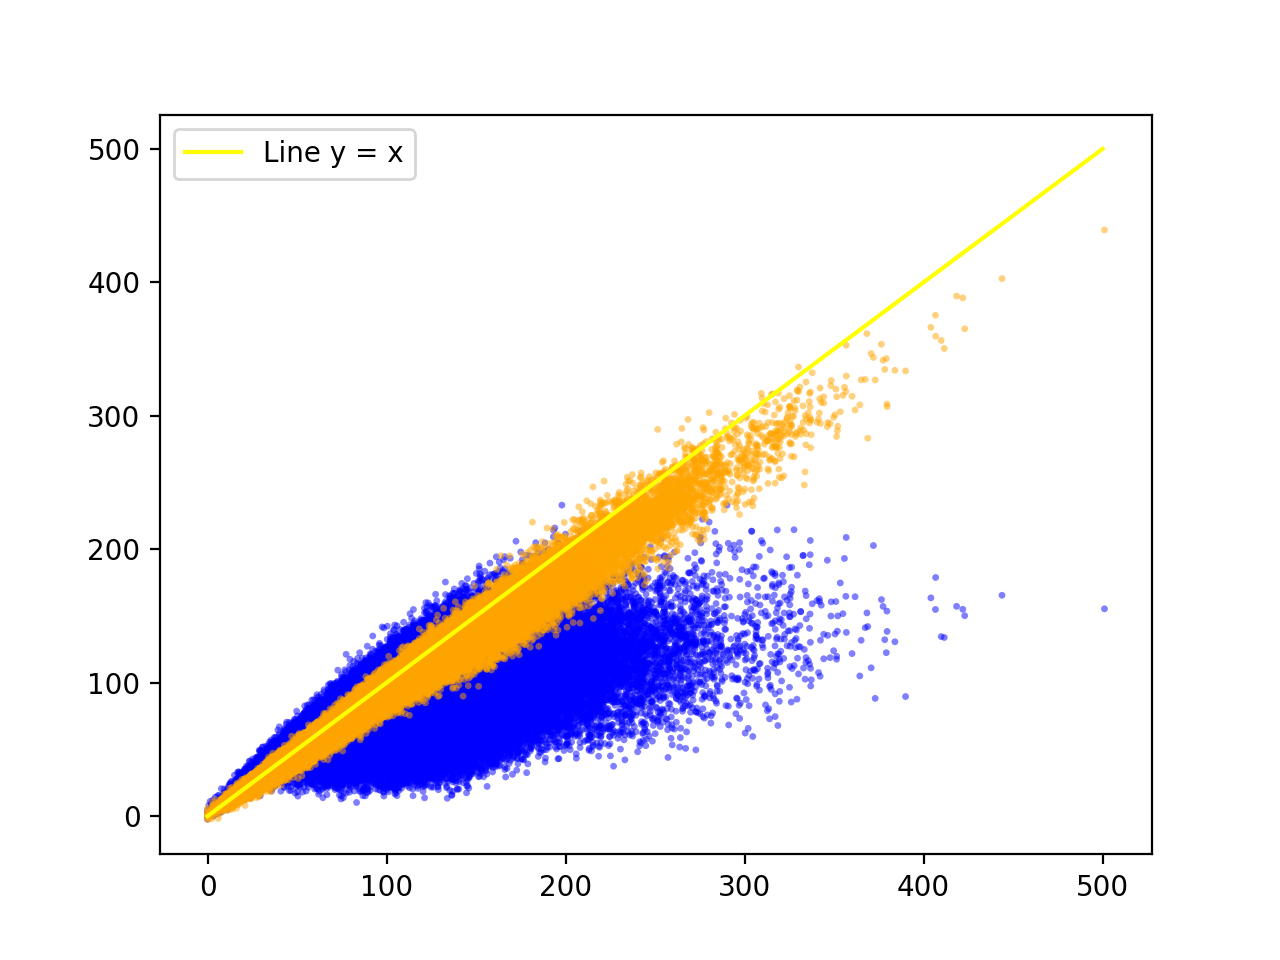

In [62]:
x1 = np.linspace(start = 0., stop = 500.0, num = 501)

plt.figure(1)
plt.scatter(wb97x_energies, model_energies, edgecolors='none', c='blue', s=6, alpha=0.5)
plt.scatter(wb97x_energies, ani1x_energies, edgecolors='none', c='orange', s=6, alpha=0.5)
plt.plot(x1, x1, c='yellow', label=('Line y = x'))
plt.legend()
plt.show()
